In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
student = pd.read_csv("/content/StudentsPerformance.csv")

In [9]:
student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [10]:
student['total score']= student['math score'] + student['reading score'] + student['writing score']

In [11]:
student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


Kolom-kolom yang ingin ditransformasikan:
1. Gender. Onehot.
2. Race/ethnicity. Onehot.
3. Parental level of education. Rank Encoder.
4. Test preparation course. Jika 'none' maka 0, jika 'completed' maka 1.
5. Lunch. Onehot.


In [12]:
onehot_columns = ['gender', 'race/ethnicity','lunch']
student = pd.get_dummies(student, columns = onehot_columns)
student

,parental level of education,test preparation course,math score,reading score,writing score,total score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard
0,bachelor's degree,none,72,72,74,218,1,0,0,1,0,0,0,0,1
1,some college,completed,69,90,88,247,1,0,0,0,1,0,0,0,1
2,master's degree,none,90,95,93,278,1,0,0,1,0,0,0,0,1
3,associate's degree,none,47,57,44,148,0,1,1,0,0,0,0,1,0
4,some college,none,76,78,75,229,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,master's degree,completed,88,99,95,282,1,0,0,0,0,0,1,0,1
996,high school,none,62,55,55,172,0,1,0,0,1,0,0,1,0
997,high school,completed,59,71,65,195,1,0,0,0,1,0,0,1,0
998,some college,completed,68,78,77,223,1,0,0,0,0,1,0,0,1


In [13]:
student['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

https://cde.drugabuse.gov/instrument/f95e95e8-efae-362b-e040-bb89ad4314f1/module/f95e98db-b327-66b7-e040-bb89ad4351b0/question/fa657752-3f53-bece-e040-bb89ad433db6

In [14]:
dummy = pd.DataFrame()
### Create Dictionary
education_dict = {
    'some high school':1,
    'high school':2,
    'some college':3,
    "associate's degree":4,
    "bachelor's degree":5,
    "master's degree":6
}

%time dummy['parental level of education'] = student['parental level of education'].map(education_dict)

CPU times: user 2.71 ms, sys: 0 ns, total: 2.71 ms
Wall time: 2.73 ms


In [15]:
student['parental level of education'] = student['parental level of education'].map(education_dict)
student

,parental level of education,test preparation course,math score,reading score,writing score,total score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard
0,5,none,72,72,74,218,1,0,0,1,0,0,0,0,1
1,3,completed,69,90,88,247,1,0,0,0,1,0,0,0,1
2,6,none,90,95,93,278,1,0,0,1,0,0,0,0,1
3,4,none,47,57,44,148,0,1,1,0,0,0,0,1,0
4,3,none,76,78,75,229,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,completed,88,99,95,282,1,0,0,0,0,0,1,0,1
996,2,none,62,55,55,172,0,1,0,0,1,0,0,1,0
997,2,completed,59,71,65,195,1,0,0,0,1,0,0,1,0
998,3,completed,68,78,77,223,1,0,0,0,0,1,0,0,1


In [16]:
test_preparation = {
    'completed':1,
    'none':0
}
student['test preparation course'] = student['test preparation course'].map(test_preparation)

In [17]:
student

,parental level of education,test preparation course,math score,reading score,writing score,total score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard
0,5,0,72,72,74,218,1,0,0,1,0,0,0,0,1
1,3,1,69,90,88,247,1,0,0,0,1,0,0,0,1
2,6,0,90,95,93,278,1,0,0,1,0,0,0,0,1
3,4,0,47,57,44,148,0,1,1,0,0,0,0,1,0
4,3,0,76,78,75,229,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,1,88,99,95,282,1,0,0,0,0,0,1,0,1
996,2,0,62,55,55,172,0,1,0,0,1,0,0,1,0
997,2,1,59,71,65,195,1,0,0,0,1,0,0,1,0
998,3,1,68,78,77,223,1,0,0,0,0,1,0,0,1


In [18]:
# split train test
from sklearn.model_selection import train_test_split

feature = student.drop(columns='total score')
target = student[['total score']]

feature_student_train, feature_student_test, target_student_train, target_student_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_student_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,vif_score
1,parental level of education,1.121542
2,test preparation course,1.348595
3,math score,7.914933
4,reading score,13.850967
5,writing score,19.821137
6,gender_female,inf
7,gender_male,inf
8,race/ethnicity_group A,inf
9,race/ethnicity_group B,inf
10,race/ethnicity_group C,inf


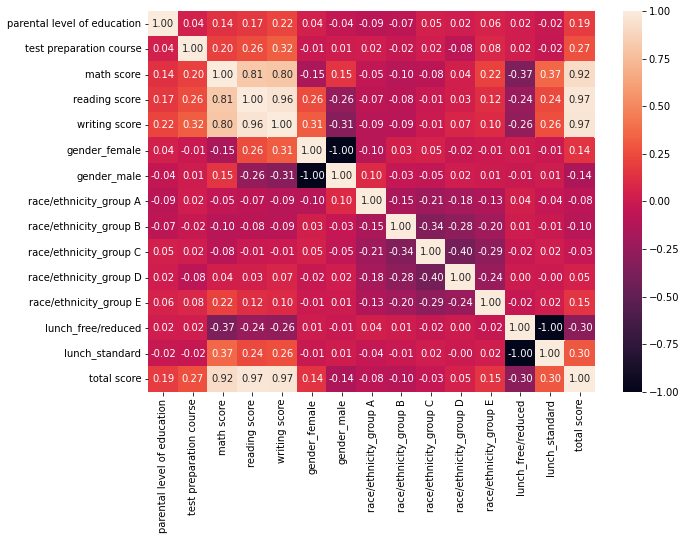

In [20]:
# heatmap correlation
student_train = pd.concat([feature_student_train, target_student_train], axis=1)
corr = student_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [21]:
feature_student_train = feature_student_train.drop(columns=['math score','writing score']) 
feature_student_test = feature_student_test.drop(columns=['math score','writing score'])

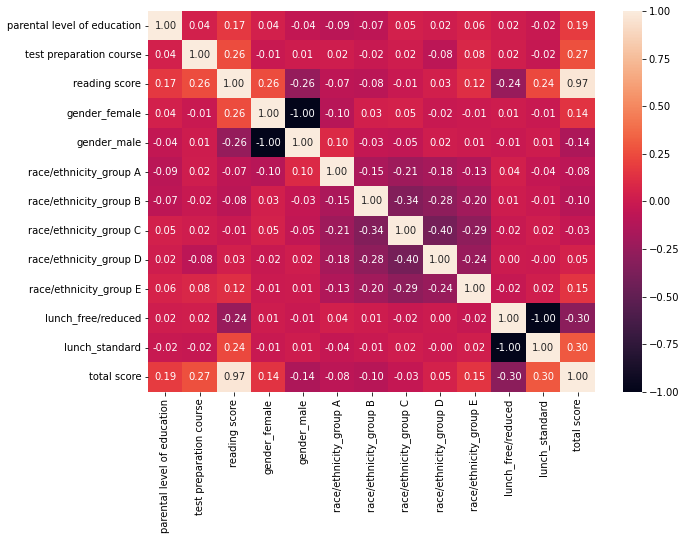

In [22]:
student_train = pd.concat([feature_student_train, target_student_train], axis=1)
corr = student_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression

# define the model
multi_reg = LinearRegression()

# train the model
X_student_train = feature_student_train.to_numpy()
y_student_train = target_student_train.to_numpy()

multi_reg.fit(X_student_train, y_student_train)
accuracy = multi_reg.score(feature_student_test, target_student_test)
print(accuracy)

0.9596695022069984


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [24]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_student_train
model = multi_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_[0]] + list(model.coef_[0])
})

coef_df

,feature,coefficient
0,intercept,4.475758
1,parental level of education,0.712432
2,test preparation course,2.280946
3,reading score,2.821686
4,gender_female,-4.331639
5,gender_male,4.331639
6,race/ethnicity_group A,-2.057637
7,race/ethnicity_group B,-1.118051
8,race/ethnicity_group C,-1.255943
9,race/ethnicity_group D,1.281240


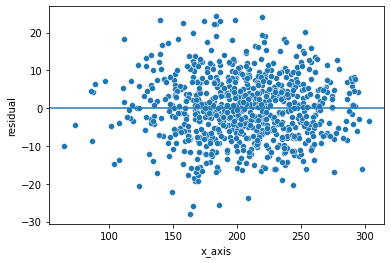

In [25]:
# calculate residuals
y_predict_train = multi_reg.predict(X_student_train)
residual = y_student_train - y_predict_train

#preprocess shape
y_predict_train = np.array([value for nested_array in y_predict_train for value in nested_array])
residual = np.array([value for nested_array in residual for value in nested_array])

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()

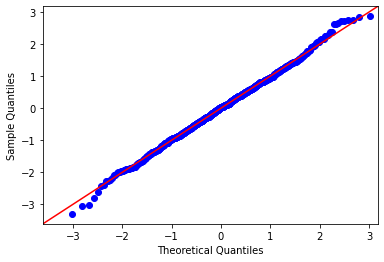

In [26]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_student_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_student_train))))

R-squared for training data is 0.9583021197157725
RMSE for training data is 8.476640449444524


In [28]:
# prepare prediction result on test data
X_student_test = feature_student_test.to_numpy()
y_predict_test = multi_reg.predict(X_student_test)

# ground truth target
y_student_test = target_student_test.to_numpy()

In [29]:
from sklearn.metrics import mean_squared_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_student_test))))

RMSE for testing data is 8.820974611378832


In [30]:
from sklearn.linear_model import Ridge

# train the model
X_student_train = feature_student_train.to_numpy()
y_student_train = target_student_train.to_numpy()
y_student_train = y_student_train.reshape(len(y_student_train),)

# define the model
ridge_reg = Ridge(alpha=0.1, 
                  random_state=42)

ridge_reg.fit(X_student_train, y_student_train)

Ridge(alpha=0.1, random_state=42)

In [32]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_student_train
model = ridge_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,4.475311
1,parental level of education,0.712435
2,test preparation course,2.279587
3,reading score,2.821706
4,gender_female,-4.330581
5,gender_male,4.330581
6,race/ethnicity_group A,-2.054541
7,race/ethnicity_group B,-1.117625
8,race/ethnicity_group C,-1.255721
9,race/ethnicity_group D,1.280320


In [52]:
# split train test
from sklearn.model_selection import train_test_split

feature = student.drop(columns='total score')
target = student[['total score']]

feature_student_pretrain, feature_student_test, target_student_pretrain, target_student_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_student_train, feature_student_validation, target_student_train, target_student_validation = train_test_split(feature_student_pretrain, target_student_pretrain, test_size=0.20, random_state=42)

In [53]:
feature_student_train = feature_student_train.drop(columns=['math score','writing score'])
feature_student_validation = feature_student_validation.drop(columns=['math score','writing score'])
feature_student_test = feature_student_test.drop(columns=['math score','writing score'])

In [54]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# train the model
X_student_train = feature_student_train.to_numpy()
y_student_train = target_student_train.to_numpy()
y_student_train = y_student_train.reshape(len(y_student_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_student_train, y_student_train)
ridge_reg_pointone.fit(X_student_train, y_student_train)
ridge_reg_one.fit(X_student_train, y_student_train)
ridge_reg_ten.fit(X_student_train, y_student_train)

lasso_reg_pointzeroone.fit(X_student_train, y_student_train)
lasso_reg_pointone.fit(X_student_train, y_student_train)
lasso_reg_one.fit(X_student_train, y_student_train)
lasso_reg_ten.fit(X_student_train, y_student_train)

Lasso(alpha=10, random_state=42)

In [50]:
from sklearn.metrics import mean_squared_error

X_student_validation = feature_student_validation.to_numpy()
y_student_validation = target_student_validation.to_numpy()
y_student_validation = y_student_validation.reshape(len(y_student_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]


for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_student_validation)
    rmse = np.sqrt(mean_squared_error(y_student_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 8.443611937531072
RMSE of Ridge regression model with alpha = 0.1 is 8.443340577580788
RMSE of Ridge regression model with alpha = 1.0 is 8.4406953089643
RMSE of Ridge regression model with alpha = 10 is 8.420138900875411


In [56]:
from sklearn.metrics import mean_squared_error

X_student_validation = feature_student_validation.to_numpy()
y_student_validation = target_student_validation.to_numpy()
y_student_validation = y_student_validation.reshape(len(y_student_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_student_validation)
    rmse = np.sqrt(mean_squared_error(y_student_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 8.434915313166297
RMSE of Lasso regression model with alpha = 0.1 is 8.374931184064598
RMSE of Lasso regression model with alpha = 1.0 is 8.784055529324917
RMSE of Lasso regression model with alpha = 10 is 9.87408676656274


In [38]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_student_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,4.713325
1,parental level of education,0.702909
2,test preparation course,2.535844
3,reading score,2.814563
4,gender_female,-4.102357
5,gender_male,4.102357
6,race/ethnicity_group A,-2.023234
7,race/ethnicity_group B,-1.040463
8,race/ethnicity_group C,-1.509569
9,race/ethnicity_group D,1.467506


In [57]:
lasso_best = lasso_reg_pointone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_student_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,1.061307e+01
1,parental level of education,6.626190e-01
2,test preparation course,2.213772e+00
3,reading score,2.820194e+00
4,gender_female,-8.084833e+00
5,gender_male,9.979173e-15
6,race/ethnicity_group A,-7.416651e-02
7,race/ethnicity_group B,-0.000000e+00
8,race/ethnicity_group C,-1.391765e-01
9,race/ethnicity_group D,2.286111e+00


In [39]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_student_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_student_train)))

R-squared for training data is 0.9577226408972702


In [58]:
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_student_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_student_train)))

R-squared for training data is 0.9574608838744423


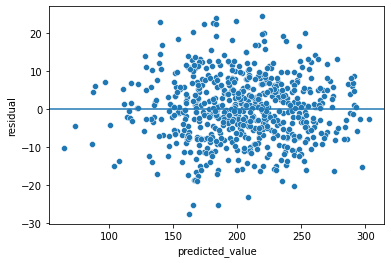

In [40]:
# calculate residuals
residual = y_student_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

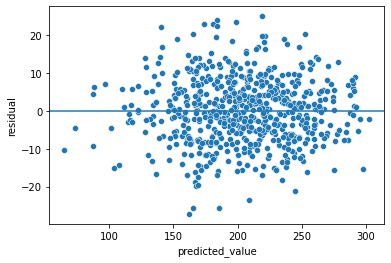

In [59]:
# calculate residuals
residual = y_student_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

In [41]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_student_train)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_student_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_student_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_student_train)))

RMSE for training data is 8.501198876675783
MAE for training data is 6.727824686793679
MAPE for training data is 0.03499924173236252


In [60]:
# prepare prediction result on train data
y_predict_train = lasso_best.predict(X_student_train)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_student_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_student_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_student_train)))

RMSE for training data is 8.52039058795981
MAE for training data is 6.749396475004204
MAPE for training data is 0.035108842508827585


In [42]:
# prepare prediction result on test data
X_student_test = feature_student_test.to_numpy()
y_predict_test = ridge_best.predict(X_student_test)

# ground truth target
y_student_test = target_student_test.to_numpy()
y_student_test = y_student_test.reshape(len(y_student_test),)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_student_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_student_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_student_test)))

RMSE for testing data is 8.79623129646726
MAE for testing data is 6.973102175816352
MAPE for testing data is 0.03879168801264253


In [61]:
# prepare prediction result on test data
X_student_test = feature_student_test.to_numpy()
y_predict_test = lasso_best.predict(X_student_test)

# ground truth target
y_student_test = target_student_test.to_numpy()
y_student_test = y_student_test.reshape(len(y_student_test),)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_student_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_student_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_student_test)))

RMSE for testing data is 8.80579109487324
MAE for testing data is 6.964311894541631
MAPE for testing data is 0.03877572617453798
